In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
dataframe = pd.read_csv('ecg.csv', )
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [10]:
print(dataframe.shape)
print("------------")
print(dataframe[140].value_counts())

(4998, 141)
------------
1.0    2919
0.0    2079
Name: 140, dtype: int64


In [12]:
labels = raw_data[:,-1]
data = raw_data[:,:-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,stratify=labels)

min_val = X_train.min(axis=0)
max_val = X_train.max(axis=0)

X_train = (X_train-min_val) / (max_val-min_val)
X_test = (X_test-min_val) / (max_val- min_val)

X_train_normal = X_train[y_train==1]
X_test_normal = X_test[y_test==1]

X_train_anomaly = X_train[y_train==0]
X_test_anomaly = X_test[y_test==0]

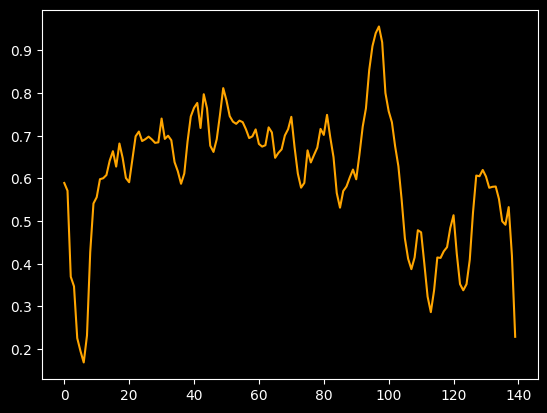

In [25]:
plt.style.use('dark_background')
plt.plot(X_train_normal[1],"-",color="orange")

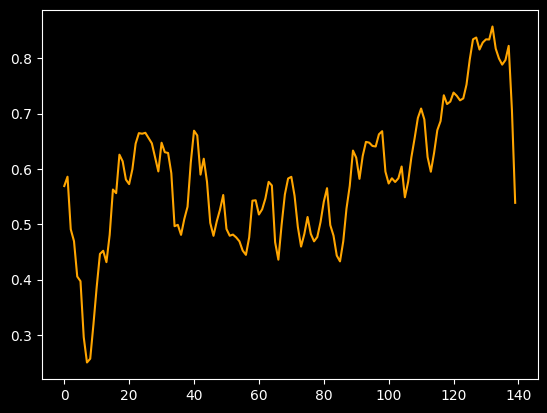

In [26]:
plt.style.use('dark_background')
plt.plot(X_train_anomaly[1],"-",color="orange")

In [27]:
mdl = keras.Sequential()

mdl.add(layers.Dense(128,activation='relu',input_shape=(X_train.shape[1],)))
mdl.add(layers.Dense(64,activation='relu'))
mdl.add(layers.Dense(32,activation='relu'))
mdl.add(layers.Dense(64,activation='relu'))
mdl.add(layers.Dense(128,activation='relu'))
mdl.add(layers.Dense(X_train.shape[1],activation='sigmoid'))

mdl.compile(optimizer='adam',loss='mse')
mdl.fit(X_train_normal,X_train_normal, epochs=10,batch_size=10)

Epoch 1/10
234/234 [==============================] - 2s 3ms/step - loss: 0.0054
Epoch 2/10
234/234 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 3/10
234/234 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 4/10
234/234 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 5/10
234/234 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 6/10
234/234 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 7/10
234/234 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 8/10
234/234 [==============================] - 1s 3ms/step - loss: 9.8325e-04
Epoch 9/10
234/234 [==============================] - 1s 3ms/step - loss: 8.8232e-04
Epoch 10/10
234/234 [==============================] - 1s 4ms/step - loss: 8.3066e-04


In [30]:
X_pred = mdl.predict(X_train_normal)
train_mae = keras.metrics.mean_absolute_error(X_train_normal,X_pred).numpy()
train_mae

73/73 [==============================] - 0s 2ms/step


array([0.01705382, 0.05518572, 0.0148313 , ..., 0.0226026 , 0.02166812,
       0.01982641], dtype=float32)

(array([1.59e+03, 5.86e+02, 1.03e+02, 3.30e+01, 1.10e+01, 4.00e+00,
        5.00e+00, 0.00e+00, 1.00e+00, 2.00e+00]),
 array([0.00777326, 0.01965451, 0.03153577, 0.04341702, 0.05529827,
        0.06717953, 0.07906078, 0.09094203, 0.10282329, 0.11470454,
        0.1265858 ]),
 <BarContainer object of 10 artists>)

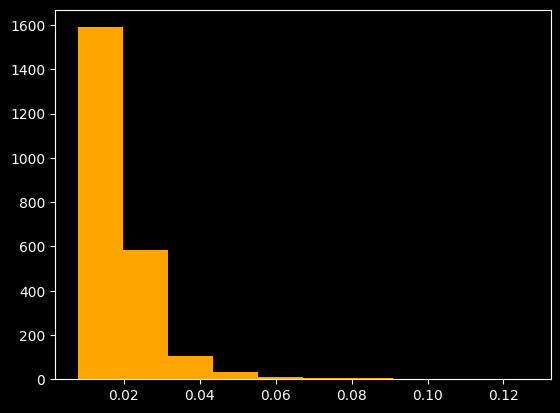

In [32]:
plt.hist(train_mae,color='orange')

In [33]:
thr = train_mae.mean() + train_mae.std()
thr

0.028466318

In [35]:
X_pred_test = mdl.predict(X_test)
test_mae = keras.metrics.mean_absolute_error(X_test,X_pred_test).numpy()
test_mae.shape

32/32 [==============================] - 0s 3ms/step


(1000,)

In [42]:
ypred = np.zeros(test_mae.shape)
ypred[test_mae < thr] =1

In [43]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score

print(accuracy_score(y_test,ypred))
print(recall_score(y_test,ypred))
print(roc_auc_score(y_test,ypred))

0.95
0.9143835616438356
0.9571917808219178
